In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\vinis\\Desktop\\Programacao\\DataSets\\alura_curso.csv', sep=';')
df.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Praia     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


In [14]:
df.shape

(5000, 4)

In [15]:
df.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


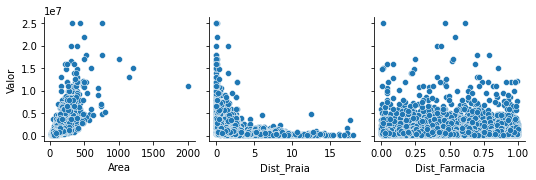

In [16]:
sns.pairplot(df, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'])
# Curva muito assimétrica para a direita, então tentaremos normalizar a simetria usando o log

In [17]:
df['log_Valor'] = np.log(df['Valor'])
df['log_Area'] = np.log(df['Area'])
df['log_Dist_Praia'] = np.log(df['Dist_Praia'] + 1)
df['log_Dist_Farmacia'] = np.log(df['Dist_Farmacia'] + 1)
df.head()

#Criando novas colunas no dataframe com o log das colunas anteriores. Utilizasse o +1 quando o valor é 0
#Assim evitando que o log seja infinito

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


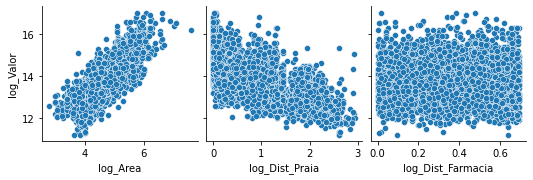

In [18]:
sns.pairplot(df, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'])

#Plotando os novos gráficos com uma distribuição mais simétrica

In [19]:
y = df['log_Valor']
x = df[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]
modelo = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
modelo.fit(x_train, y_train)

LinearRegression()

In [20]:
#Coeficiente de determinação da amostra de treino
print("R²: {}".format(modelo.score(x_train, y_train).round(3)))

R²: 0.806


In [21]:
previsoes = modelo.predict(x_test)

In [22]:
#R2 das previsões (Coeficiente de determinação)
print("R²: %s"% metrics.r2_score(y_test, previsoes).round(3))

R²: 0.788


In [23]:
entrada = x_test[0:1]
entrada

,log_Area,log_Dist_Praia,log_Dist_Farmacia
71,4.248495,2.202804,0.646421


In [25]:
modelo.predict(entrada)[0]

12.757052584790273

In [26]:
#Transformando os valores em reais
np.exp(modelo.predict(entrada)[0])

346990.4666048245

In [30]:
#Simulando a entrada com base em valores diferentes
Area = 170
Dist_Praia = 3
Dist_Farmacia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1), np.log(Dist_Farmacia + 1)]]

print("O imóvel custa R$%.2f"% np.exp(modelo.predict(entrada)[0]))

O imóvel custa R$1313005.32


C:\Users\vinis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
#Buscando o intercept do Y
modelo.intercept_
np.exp(modelo.intercept_)

12288.225236918519

In [40]:
index = ['Intercepto','log Área', 'log Distância até a Praia', 'log Distância Farmácia']
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.416397
log Área,1.041825
log Distância até a Praia,-0.496884
log Distância Farmácia,0.013931


<AxesSubplot:ylabel='log_Valor'>

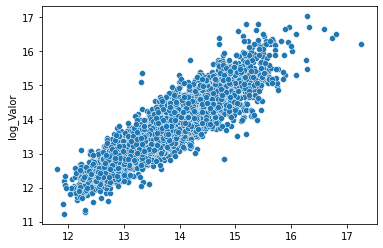

In [44]:

sns.scatterplot(x=modelo.predict(x_train), y=y_train)